## Import Modules
For this dataset the following modules were considered necessary for the sort of exploratory data analysis we were considering.

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import warnings
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Data Preparation

## a) Reading in 1st dataset FAO.csv
The Food and Agriculture Organization is a part of the United Nations and has gathered, recorded, and published data on over 245 countries. The dataset used below was submited as a CSV file containing 175 of those countries with 115 food varieties recorded. The csv is loaded as a pandas dataframe and several columns are dropped for simplicity.

In [96]:
#Read the 1st dataset FAO.csv
url = 'https://raw.githubusercontent.com/ramkguru97/Group_6_6162/main/Final_Submission/FAO.csv'
df1 = pd.read_csv(url, encoding=('ISO-8859-1'), 
                  low_memory = False)
#Drop columns Area Abbreviation and Area Code
df1.drop(['Area Abbreviation'], axis = 1,inplace=True)
df1_dictionary = {'Area': 'Country Name'}
# call rename () method
df1.rename(columns=df1_dictionary,inplace=True)
df1.head()
df1

,Area Code,Country Name,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,230.0,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,6.0,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


## b) Reading in 2nd dataset GlobalPopulation.csv
Global population was taken from worldbank.org and lists over 245 countries and their population growth from 1961 to 2013. It is also loaded into a pandas dataframe and several columns that are not used are dropped. 

In [97]:
#Read 2nd dataset GlobalPopulation.csv
url2 = 'https://raw.githubusercontent.com/ramkguru97/Group_6_6162/main/Final_Submission/GlobalPopulation.csv'
df2 = pd.read_csv(url2, header=[0],encoding=('ISO-8859-1'), 
                  low_memory = False)
df2.drop(['Indicator Name', 'Indicator Code', 'Country Code', '1960','2014','2015','2016','2017','2018','2019','2020']
         , axis = 1,inplace=True)
df2.head()
df2

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,98744.0,100028.0,100830.0,101226.0,101362.0,101452.0,101665.0,102050.0,102565.0,103165.0
1,Africa Eastern and Southern,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,504604672.0,518468229.0,532760424.0,547482863.0,562601578.0
2,Afghanistan,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
3,Africa Western and Central,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,341050537.0,350556886.0,360285439.0,370243017.0,380437896.0
4,Angola,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,22514275.0,23356247.0,24220660.0,25107925.0,26015786.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0
262,"Yemen, Rep.",5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,5907873.0,6001858.0,6097042.0,...,19540096.0,20107416.0,20687648.0,21282514.0,21892149.0,22516464.0,23154854.0,23807586.0,24473176.0,25147112.0
263,South Africa,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,20406863.0,20942147.0,21496075.0,...,47291610.0,47880595.0,48489464.0,49119766.0,49779472.0,50477013.0,51216967.0,52003759.0,52832659.0,53687125.0
264,Zambia,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,3681953.0,3797877.0,3918872.0,4045740.0,...,11550641.0,11856244.0,12173518.0,12502958.0,12848531.0,13215142.0,13605986.0,14023199.0,14465148.0,14926551.0


## c) Dataframe Merging
Merge df1 and df2 into new dataframe, called "result", on condition of both dataframes column, 'Country Name', being equal. This also required some manual oversight as some countries are spelled slightly different and go by multiple names.

In [98]:
#Merge df1 and df2
result = df1.merge(df2, on=['Country Name'])
result.head()

,Area Code,Country Name,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
1,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
2,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
3,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
4,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0


In [99]:
result

,Area Code,Country Name,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
1,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
2,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
3,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
4,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18048,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,230.0,...,12019911.0,12076697.0,12155496.0,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18049,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,27.0,...,12019911.0,12076697.0,12155496.0,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18050,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,6.0,...,12019911.0,12076697.0,12155496.0,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18051,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,0.0,...,12019911.0,12076697.0,12155496.0,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0


In [100]:
result.to_csv("file3.csv", index=False,encoding = 'utf-8')
#result.to_csv(r'https://raw.githubusercontent.com/ramkguru97/Group_6_6162/main/file3.csv',index=False)

## d) Identifying Missing Values
In the data transformation step we analyzed data for null, NaN, and missing values so as to reduce noise, misrepresenting values, and overall confusion.

In [101]:
#identify missing values using np.nan 
result.replace("?", np.nan, inplace = True)
result.head()

,Area Code,Country Name,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
1,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
2,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
3,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
4,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0


In [102]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18053 entries, 0 to 18052
Columns: 115 entries, Area Code to 2013
dtypes: float64(106), int64(5), object(4)
memory usage: 16.0+ MB


In [103]:
result.shape

(18053, 115)

In [104]:
result.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,18053.000000,18053.000000,18053.000000,18053.000000,18053.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,...,1.805300e+04,1.805300e+04,1.805300e+04,1.805300e+04,1.805300e+04,1.805300e+04,1.805300e+04,1.805300e+04,1.805300e+04,1.805300e+04
mean,122.305877,2694.303329,5212.371019,20.152365,13.328935,152.748037,157.615623,162.969387,167.051791,169.499241,...,3.086097e+07,3.128507e+07,3.171193e+07,3.214268e+07,3.258034e+07,3.301938e+07,3.345868e+07,3.388872e+07,3.433260e+07,3.478439e+07
std,73.058753,149.021250,147.376182,25.561911,65.042986,1019.547831,1063.512371,1084.549971,1114.179654,1092.463517,...,1.022376e+08,1.038203e+08,1.053958e+08,1.069629e+08,1.085112e+08,1.100295e+08,1.115122e+08,1.129492e+08,1.143558e+08,1.157327e+08
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.374000e+04,6.415400e+04,6.452300e+04,6.488800e+04,6.527300e+04,6.563600e+04,6.512400e+04,6.456400e+04,6.479800e+04,6.500100e+04
25%,60.000000,2561.000000,5142.000000,4.570000,-10.940000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.725017e+06,2.740000e+06,2.754414e+06,2.768229e+06,2.781869e+06,2.876186e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.897593e+06
50%,118.000000,2640.000000,5142.000000,18.740000,18.490000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.680516e+06,8.840220e+06,9.043342e+06,9.148092e+06,9.219637e+06,9.298515e+06,9.378126e+06,9.460829e+06,9.519374e+06,9.600379e+06
75%,181.000000,2782.000000,5142.000000,41.870000,43.360000,20.000000,22.000000,23.000000,24.000000,25.000000,...,2.519065e+07,2.569062e+07,2.620195e+07,2.672037e+07,2.723600e+07,2.773504e+07,2.820803e+07,2.865096e+07,2.915491e+07,2.977399e+07
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,63431.000000,68508.000000,66208.000000,70097.000000,66185.000000,...,1.129623e+09,1.147610e+09,1.165486e+09,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09


In [105]:
#isnull() identify existing missing values while 
#notnull() function detects existing non-missing values in the data frame

## e) Heatmap to Show Columns with Null Values
The heatmap is used in this portion as a visualization of the quantity of null values in the beginning datasets. Many countries did not report values for food items until much later dates, leaving several thousand null values.

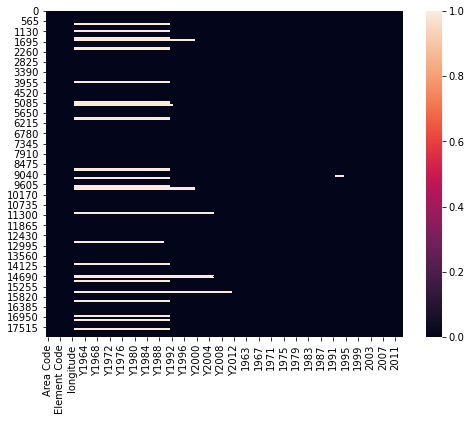

In [106]:
#heatmpa to show columns with null values
plt.figure(figsize=(8,6))
sns.heatmap(result.isnull(),cbar=True);

In [107]:
#data type
result.dtypes

Area Code         int64
Country Name     object
Item Code         int64
Item             object
Element Code      int64
                 ...   
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
Length: 115, dtype: object

In [108]:
result.shape

(18053, 115)

## f) Check for Null Values 
Here we verify the number of nulls after the data transformation techniques have removed them.

In [109]:
result.isna()

,Area Code,Country Name,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:
#check for null values
result.isnull()

,Area Code,Country Name,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [111]:
result.isna().any()

Area Code       False
Country Name    False
Item Code       False
Item            False
Element Code    False
                ...  
2009            False
2010            False
2011            False
2012            False
2013            False
Length: 115, dtype: bool

In [112]:
result.isna().sum()

Area Code       0
Country Name    0
Item Code       0
Item            0
Element Code    0
               ..
2009            0
2010            0
2011            0
2012            0
2013            0
Length: 115, dtype: int64

In [113]:
result.isna().any().sum()
#gives output in a single value if any null is present or not

54

## g) Duplicate Data Check
Given the length of time and the sheer quantity of data gathered, we verified that no duplicate information was present in the dataset.

In [114]:
# Rows containing duplicate data
duplicate_rows_result = result[result.duplicated()]
duplicate_rows_result.shape


(0, 115)

In [115]:
# Used to count the number of rows before removing the data
result.count() 

Area Code       18053
Country Name    18053
Item Code       18053
Item            18053
Element Code    18053
                ...  
2009            18053
2010            18053
2011            18053
2012            18053
2013            18053
Length: 115, dtype: int64

## h) Duplicate Data Dropping
Duplicate data was found and removed from the dataset. 

In [116]:
# Dropping the duplicates 
result= result.drop_duplicates()
result.head(5)

,Area Code,Country Name,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
1,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
2,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
3,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
4,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0


In [117]:
# Counting the number of rows after removing duplicates.
result.count()

Area Code       18053
Country Name    18053
Item Code       18053
Item            18053
Element Code    18053
                ...  
2009            18053
2010            18053
2011            18053
2012            18053
2013            18053
Length: 115, dtype: int64

## i) Drop Missing Values
Similar techniques as those used previously are used to look for missing values. None were found.

In [118]:
# Dropping the missing values.
result = result.dropna() 
result.count()

Area Code       15035
Country Name    15035
Item Code       15035
Item            15035
Element Code    15035
                ...  
2009            15035
2010            15035
2011            15035
2012            15035
2013            15035
Length: 115, dtype: int64

In [119]:
# After dropping the values
print(result.isnull().sum())

Area Code       0
Country Name    0
Item Code       0
Item            0
Element Code    0
               ..
2009            0
2010            0
2011            0
2012            0
2013            0
Length: 115, dtype: int64


In [120]:
result.columns

Index(['Area Code', 'Country Name', 'Item Code', 'Item', 'Element Code',
       'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       ...
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object', length=115)

## Exploratory Data Analysis
Feed and food production category plot encompassing entire "result" dataframe. This displays the overall count between Food and Feed and generates category plot based on the element variable
documentation referred: https://seaborn.pydata.org/generated/seaborn.catplot.html

H:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


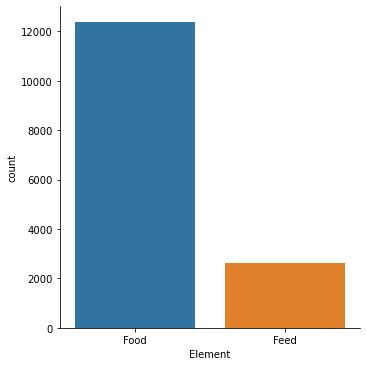

In [121]:
result.Element.unique()
sns.catplot("Element", data=result, kind="count")
plt.show()


In [122]:
# PIE CHART
#reference: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

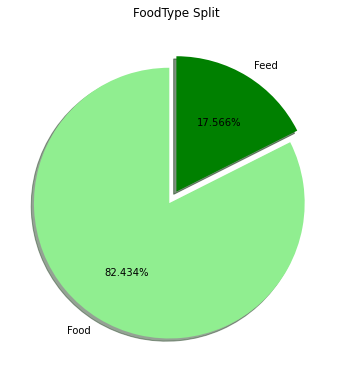

In [123]:
#Feed and food production plot - pie chart

from collections import Counter

labels, values = zip(*Counter(result["Element"]).items())
colors = ['lightgreen', 'green']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[5, 5])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.3f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("FoodType Split")
plt.show()

H:\Anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
H:\Anaconda\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
H:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


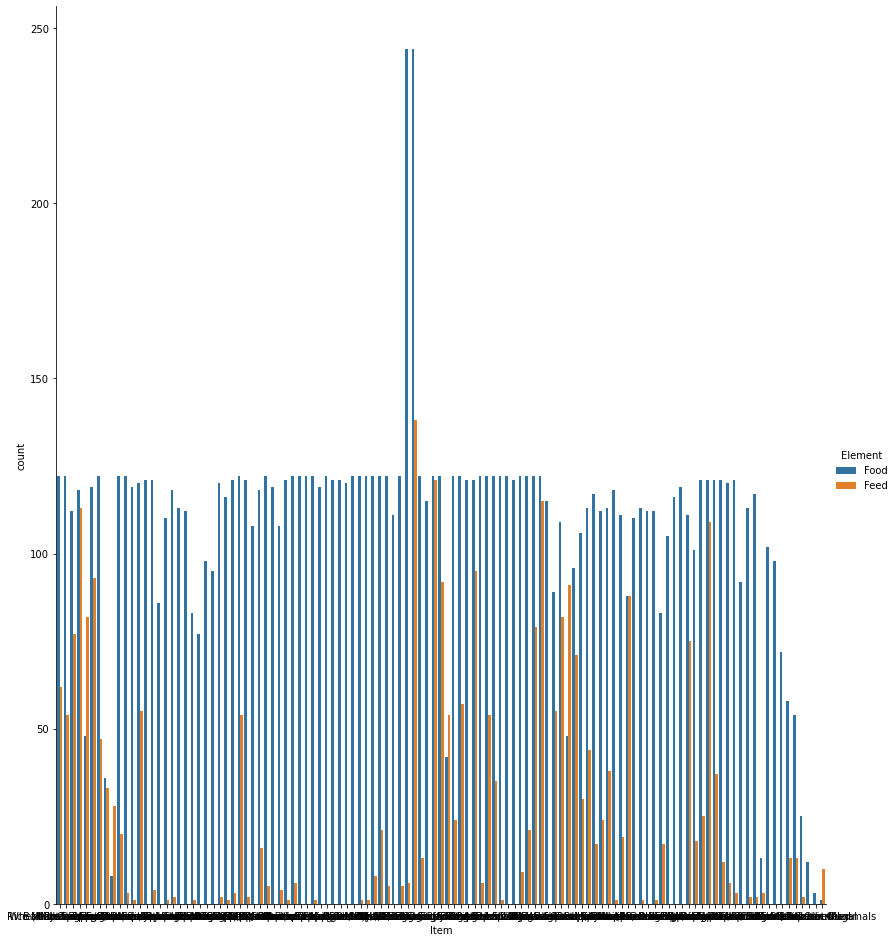

In [124]:
#factor plot to show the count of all the items produced inclusive of feed/food
#documentation referred: https://www.geeksforgeeks.org/plotting-different-types-of-plots-using-factor-plot-in-seaborn/
result.Item.unique()
sns.factorplot("Item", data=result, kind="count", hue = "Element",  size=13, aspect=0.9)
plt.show()

H:\Anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
H:\Anaconda\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
H:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


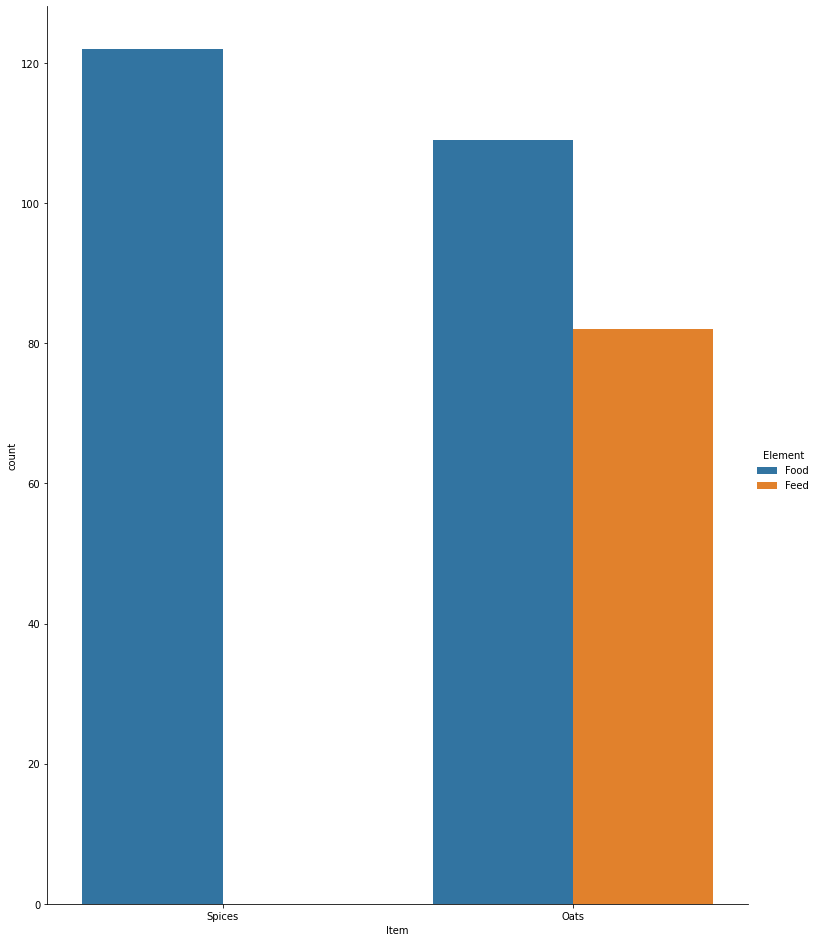

In [125]:
#factorplot --> feed/food production for items oats/spices 
#Referenced --> https://www.geeksforgeeks.org/plotting-different-types-of-plots-using-factor-plot-in-seaborn/
#used Element as the hue to show what count of oats/spices are food and feed respectively
result.Item.unique()
sns.factorplot("Item", data=result[(result['Item'] == "Oats") | (result['Item'] == "Spices") ], 
               kind="count", hue="Element", size=13, aspect=.8)

In [126]:
#Amount of Total Feed/Food Production for countries in 1990
#denoted by line plot which show cases total feed/food production combined for all the countries in 
#year 1990

<AxesSubplot:xlabel='Country Name'>

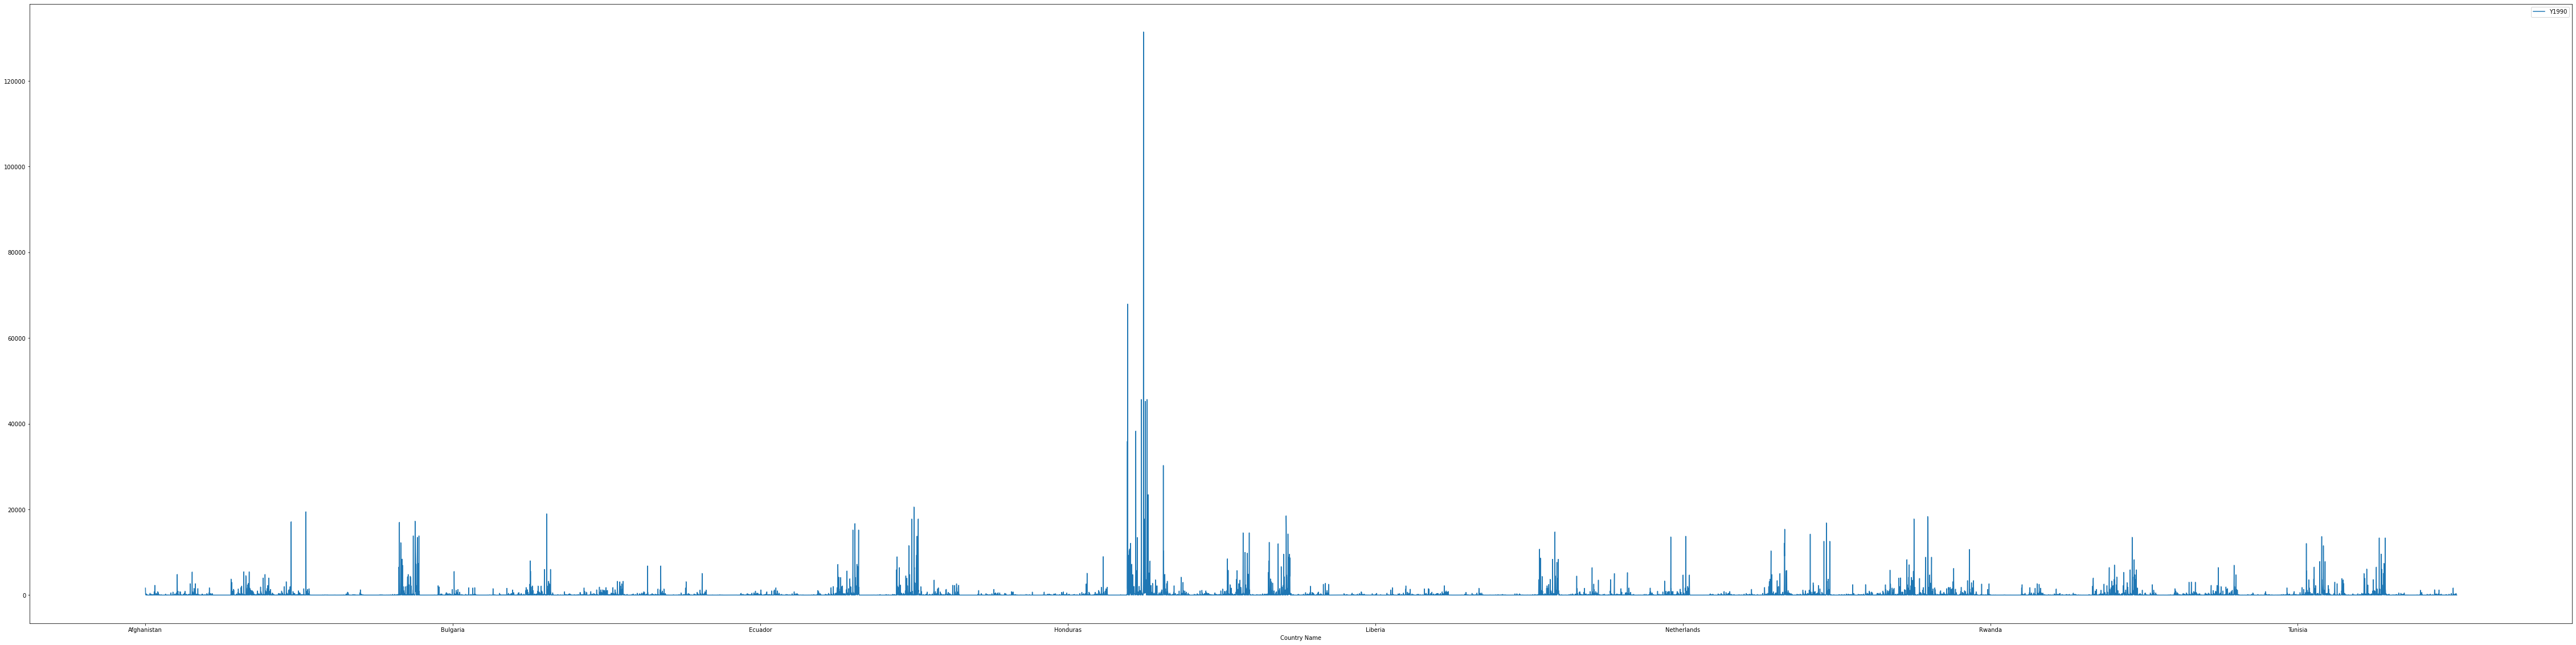

In [127]:
result.plot(kind = 'line', x = 'Country Name', y = 'Y1990', figsize=(80,20))

In [128]:
#top 20 groupings of items produced inclusive of all countries in 1961
#referenced: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html
#and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
itemGrouping = result.groupby('Item')['Y1961'].nlargest(500).sum(level=0).sort_values(axis=0, ascending=False)
itemGrouping.head(20)

Item
Milk - Excluding Butter     385686.0
Cereals - Excluding Beer    354907.0
Starchy Roots               176564.0
Potatoes and products       107596.0
Wheat and products          103619.0
Vegetables                   96941.0
Fruits - Excluding Wine      86602.0
Rice (Milled Equivalent)     80433.0
Vegetables, Other            79969.0
Maize and products           65416.0
Alcoholic Beverages          54310.0
Cassava and products         47125.0
Sugar & Sweeteners           39356.0
Meat                         37842.0
Barley and products          34026.0
Fruits, Other                32781.0
Sugar (Raw Equivalent)       28429.0
Sugar Crops                  27071.0
Sugar cane                   26042.0
Beer                         25601.0
Name: Y1961, dtype: float64

<AxesSubplot:ylabel='Item'>

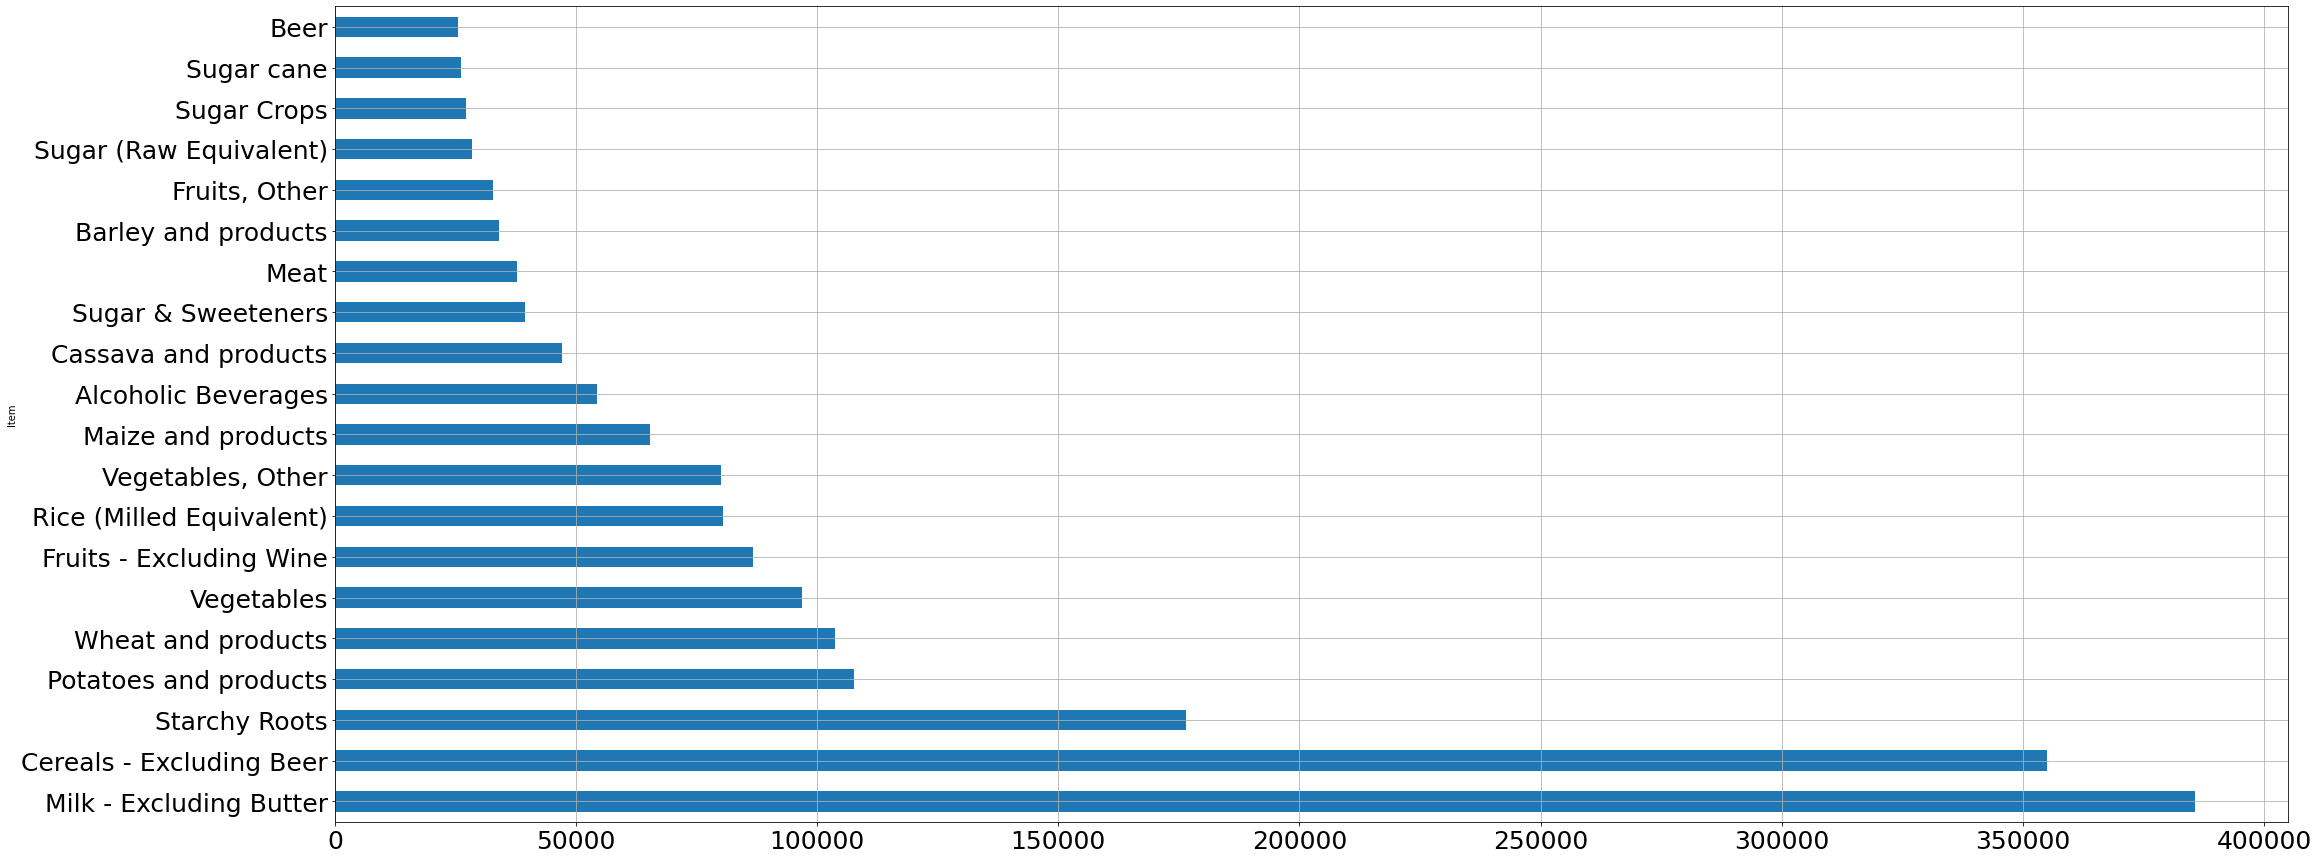

In [129]:
#Plotting horizontal barh plot to present quantitative data for the top 20 items grouped above 
#Referenced: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html
itemGrouping.head(20).plot(kind='barh', figsize=(35,15), grid=True, fontsize=25)

In [130]:
# top 10 food/feed production for Y1961
#Referenced: https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html
ff_top = result.nlargest(15, 'Y1961')
ff_top

,Area Code,Country Name,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
7653,100,India,2905,Cereals - Excluding Beer,5142,Food,1000 tonnes,20.59,78.96,63431.0,...,1.129623e+09,1.147610e+09,1.165486e+09,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7550,100,India,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,20.59,78.96,30617.0,...,1.129623e+09,1.147610e+09,1.165486e+09,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
13573,173,Poland,2531,Potatoes and products,5521,Feed,1000 tonnes,51.92,19.15,23400.0,...,3.818222e+07,3.816544e+07,3.814127e+07,3.812056e+07,3.812576e+07,3.815160e+07,3.804279e+07,3.806326e+07,3.806316e+07,3.804020e+07
13664,173,Poland,2907,Starchy Roots,5521,Feed,1000 tonnes,51.92,19.15,23400.0,...,3.818222e+07,3.816544e+07,3.814127e+07,3.812056e+07,3.812576e+07,3.815160e+07,3.804279e+07,3.806326e+07,3.806316e+07,3.804020e+07
7639,100,India,2848,Milk - Excluding Butter,5142,Food,1000 tonnes,20.59,78.96,17487.0,...,1.129623e+09,1.147610e+09,1.165486e+09,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7676,100,India,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,20.59,78.96,17487.0,...,1.129623e+09,1.147610e+09,1.165486e+09,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7665,100,India,2918,Vegetables,5142,Food,1000 tonnes,20.59,78.96,16925.0,...,1.129623e+09,1.147610e+09,1.165486e+09,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
6160,79,Germany,2905,Cereals - Excluding Beer,5521,Feed,1000 tonnes,51.17,10.45,16017.0,...,8.251626e+07,8.246942e+07,8.237645e+07,8.226637e+07,8.211010e+07,8.190231e+07,8.177693e+07,8.027498e+07,8.042582e+07,8.064560e+07
6162,79,Germany,2907,Starchy Roots,5521,Feed,1000 tonnes,51.17,10.45,15758.0,...,8.251626e+07,8.246942e+07,8.237645e+07,8.226637e+07,8.211010e+07,8.190231e+07,8.177693e+07,8.027498e+07,8.042582e+07,8.064560e+07
7603,100,India,2605,"Vegetables, Other",5142,Food,1000 tonnes,20.59,78.96,15475.0,...,1.129623e+09,1.147610e+09,1.165486e+09,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09


In [131]:
# .unique() to fnd the unique countries in 1961 that affect the feed/food production
#Referenced https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html
ff_top['Country Name'].unique()

array(['India', 'Poland', 'Germany', 'Japan'], dtype=object)

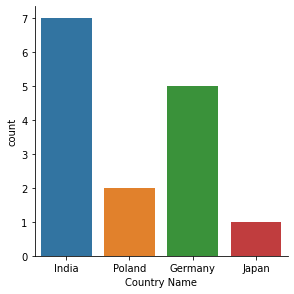

In [132]:
# category plot which plots top 15 productions for food and feed for 1961
sns.catplot(x= 'Country Name', data = ff_top, kind ='count', height = 4, aspect = 1);

In [133]:
# examining food items for that year 1961
print(ff_top.Item.unique())
# top countries which producted item 'starchy roots' in  1961
ff_items_SR = ff_top[ff_top.Item == 'Starchy Roots']
print(ff_items_SR)           

['Cereals - Excluding Beer' 'Rice (Milled Equivalent)'
 'Potatoes and products' 'Starchy Roots' 'Milk - Excluding Butter'
 'Vegetables' 'Vegetables, Other' 'Wheat and products']
       Area Code Country Name  Item Code           Item  Element Code Element  \
13664        173       Poland       2907  Starchy Roots          5521    Feed   
6162          79      Germany       2907  Starchy Roots          5521    Feed   

              Unit  latitude  longitude    Y1961  ...        2004        2005  \
13664  1000 tonnes     51.92      19.15  23400.0  ...  38182222.0  38165445.0   
6162   1000 tonnes     51.17      10.45  15758.0  ...  82516260.0  82469422.0   

             2006        2007        2008        2009        2010        2011  \
13664  38141267.0  38120560.0  38125759.0  38151603.0  38042794.0  38063255.0   
6162   82376451.0  82266372.0  82110097.0  81902307.0  81776930.0  80274983.0   

             2012        2013  
13664  38063164.0  38040196.0  
6162   80425823.0  8064560

In [134]:
#Population growth of european countries from 1980 - 1995 with respect to food production of a certain
#item
df3 = pd.read_csv('file3.csv')

globalPopulation = df3[['1961', '1962','1963','1964','1965','1966','1967','1968','1969','1970','1971',
'1972',	'1973',	'1974',	'1975',	'1976',	'1977',	'1978',	'1979',	'1980',	'1981',	'1982',	'1983',
'1984',	'1985',	'1986',	'1987',	'1988',	'1989',	'1990',	'1991',	'1992',	'1993',	'1994',	'1995',	
'1996',	'1997',	'1998',	'1999',	'2000',	'2001',	'2002',	'2003',	'2004',	'2005',	'2006',	'2007',	
'2008',	'2009',	'2010',	'2011',	'2012',	'2013']]
globalPopulation.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,11173654.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
1,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,11173654.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
2,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,11173654.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
3,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,11173654.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
4,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,11173654.0,...,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0


## Modeling 
Unsupervised Learning: K Means Clustering was used in the modeling.

In [135]:
# Reference : Datacamp. 
from pandas import DataFrame
Data = {'x': ff_top['Area Code'],
        'y': ff_top['Item Code']
       }
  
df = DataFrame(Data,columns=['x','y'])
print (df)

         x     y
7653   100  2905
7550   100  2805
13573  173  2531
13664  173  2907
7639   100  2848
7676   100  2948
7665   100  2918
6160    79  2905
6162    79  2907
7603   100  2605
8582   110  2905
6064    79  2531
6145    79  2848
6187    79  2948
7548   100  2511


In [136]:
# from Datacamp: K-Mean Clustering and finding the initial Centriods
# Centriods :  A general measure of cluster location and to help interpret each cluster.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 102.5        2917.875     ]
 [ 117.33333333 2524.33333333]
 [  93.         2833.66666667]
 [ 100.         2605.        ]]


In [137]:
# Importing Package for UNSUPERVISED learing:
from mlxtend.frequent_patterns import apriori, association_rules 
from pandas import DataFrame
#he tkinter module in Python to display the clusters on a simple graphical user interface
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import filedialog
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

In [ ]:
# Reference: https://datatofish.com/k-means-clustering-python/ 
# Kmeans : Since our variables are huge, then  K-Means most of the times computationally faster than hierarchical clustering
# So applying K-Means, we are trying to find Centroids [ Country Code Vs Item Code : Country Code will have unique 
# Latitude/Longitute ] - optimised latitude/longitude where a given food item can be grown for surplus production to balance
# supply - demand [ Food production vs Population]
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 100, height = 100)
canvas1.pack()

label1 = tk.Label(root, text=centroids, justify = 'center')
canvas1.create_window(70, 50, window=label1)

figure1 = plt.Figure(figsize=(5,4), dpi=100)
ax1 = figure1.add_subplot(111)
ax1.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
scatter1 = FigureCanvasTkAgg(figure1, root) 
scatter1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)

root.mainloop()

In [ ]:
# Extenion of the above code, will help predict optimized Centriods for given population of samples - Here the population 
# is food item production vs latitude-longitude or Country Code or Area Code.
#Import an Excel file with two-dimensional dataset
#Type the number of clusters needed
#Display the clusters and centroids
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 300,  relief = 'raised')
canvas1.pack()

label1 = tk.Label(root, text='k-Means Clustering')
label1.config(font=('helvetica', 14))
canvas1.create_window(200, 25, window=label1)

label2 = tk.Label(root, text='Type Number of Clusters:')
label2.config(font=('helvetica', 8))
canvas1.create_window(200, 120, window=label2)

entry1 = tk.Entry (root) 
canvas1.create_window(200, 140, window=entry1)

def getExcel ():
    
    global df
    import_file_path = filedialog.askopenfilename()
    read_file = pd.read_excel (import_file_path)
    df = DataFrame(read_file,columns=['x','y'])  
    
browseButtonExcel = tk.Button(text=" Import Excel File ", command=getExcel, bg='green', fg='white', font=('helvetica', 10, 'bold'))
canvas1.create_window(200, 70, window=browseButtonExcel)

def getKMeans ():
    global df
    global numberOfClusters
    numberOfClusters = int(entry1.get())
    
    kmeans = KMeans(n_clusters=numberOfClusters).fit(df)
    centroids = kmeans.cluster_centers_
    
    label3 = tk.Label(root, text= centroids)
    canvas1.create_window(200, 250, window=label3)
    
    figure1 = plt.Figure(figsize=(4,3), dpi=100)
    ax1 = figure1.add_subplot(111)
    ax1.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    scatter1 = FigureCanvasTkAgg(figure1, root) 
    scatter1.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
    
processButton = tk.Button(text=' Process k-Means ', command=getKMeans, bg='brown', fg='white', font=('helvetica', 10, 'bold'))
canvas1.create_window(200, 170, window=processButton)

root.mainloop()